# Ejemplo Regresión Logistica 

Vamos a trabajar con la base de datos disponible en https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset 


In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


## Cargar Datos 

In [10]:
df=pd.read_csv(r'db/Dry_Bean.csv')
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [12]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [13]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [22]:
df.duplicated().value_counts()

False    13543
True        68
dtype: int64

Tenemos 68 Entradas Duplicadas de datos y 13543 Entradas de Datos Unicas, por ende tomemos la desición de eliminar los duplicados

In [27]:
df_wd=df.drop_duplicates()
df_wd.duplicated().value_counts()
print(df_wd.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

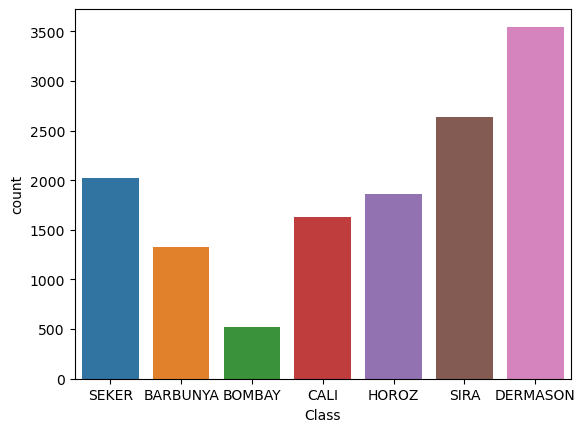

In [29]:
import seaborn as sns 
sns.countplot(data=df_wd,x='Class')

## Balanceando Empleando UnderSampling 

SEKER       3546
BARBUNYA    3546
BOMBAY      3546
CALI        3546
HOROZ       3546
SIRA        3546
DERMASON    3546
Name: Class, dtype: int64


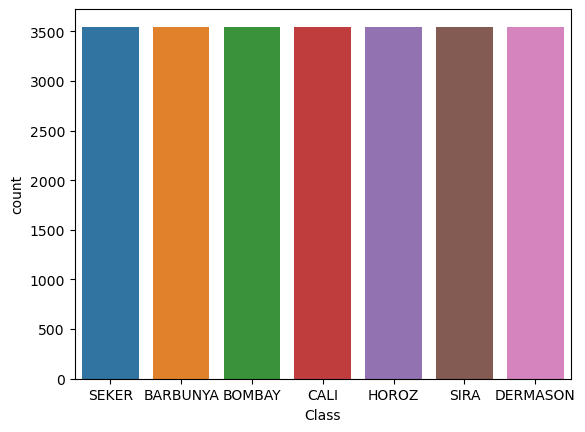

In [82]:
from imblearn.over_sampling import RandomOverSampler
oversampler=RandomOverSampler(random_state=83)

X=df_wd.drop('Class',axis=1)
y=df_wd.Class

X_over, y_over = oversampler.fit_resample(X,y)

sns.countplot(data=y_over,x=y_over)

print(y_over.value_counts())

## Analisis Exploratorio de los Datos 

### Calculos de Correlación 

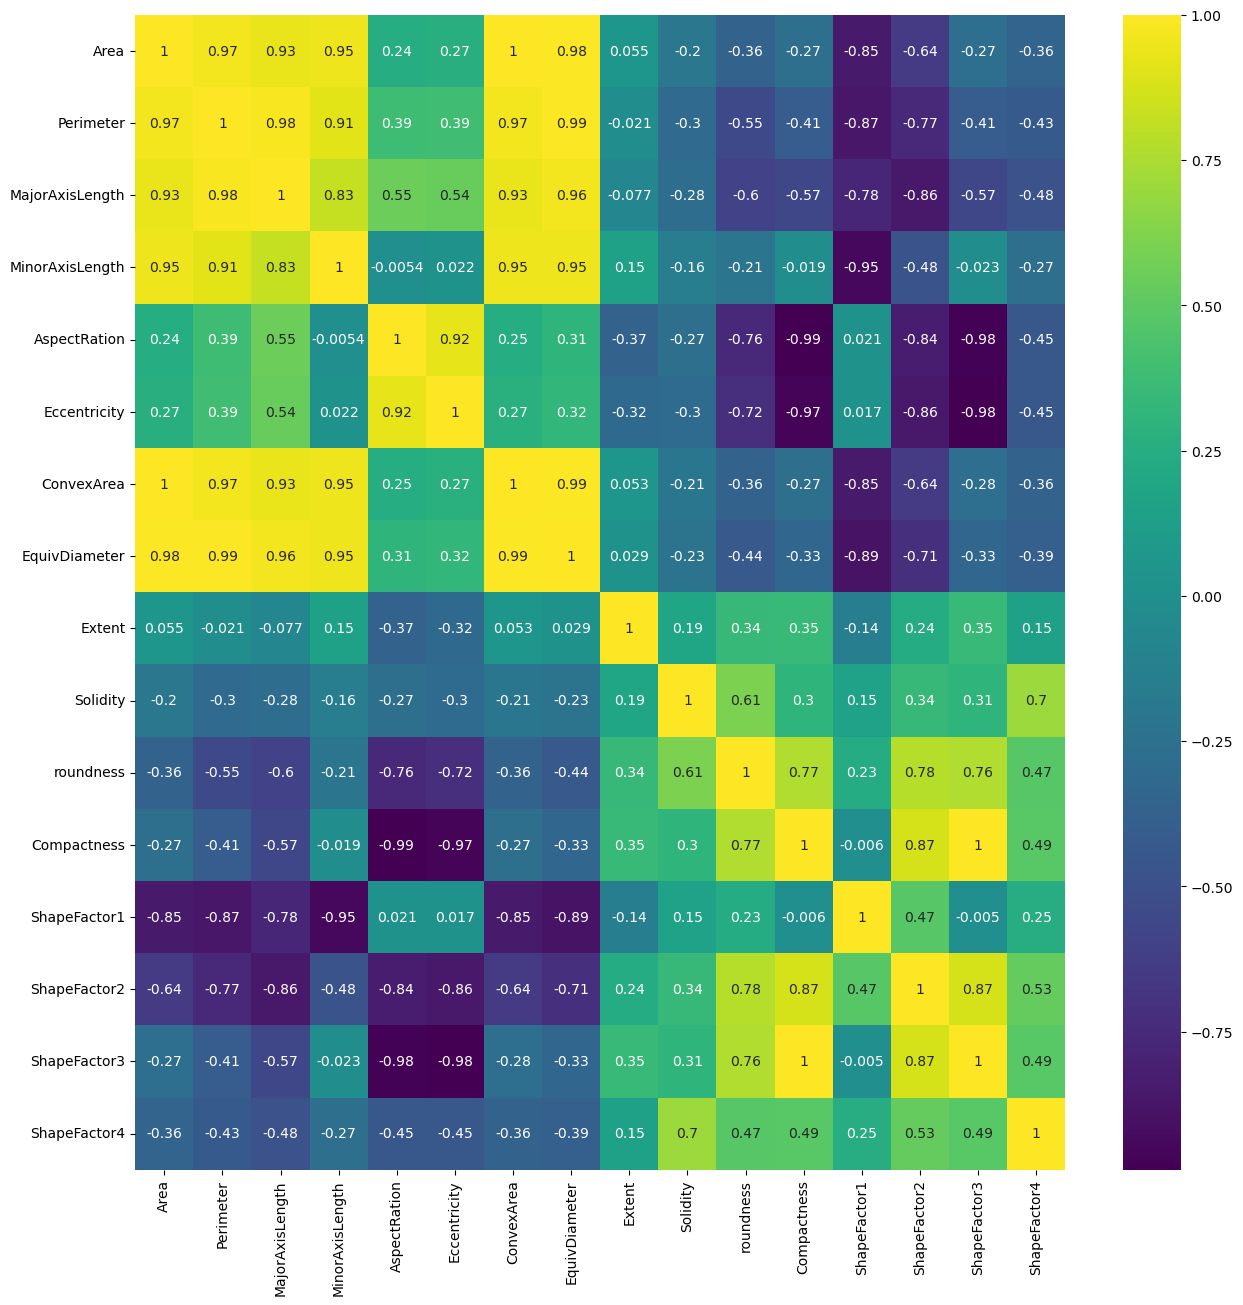

In [83]:
corr=df_wd.corr()
coor_matrix=corr.abs()
upper=coor_matrix.where(np.triu(np.ones(coor_matrix.shape),k=1).astype(bool))
to_drop= [column for column in upper.columns if any(upper[column]>0.75)]
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='viridis')
df_clean=df_wd.drop(to_drop,axis=1)

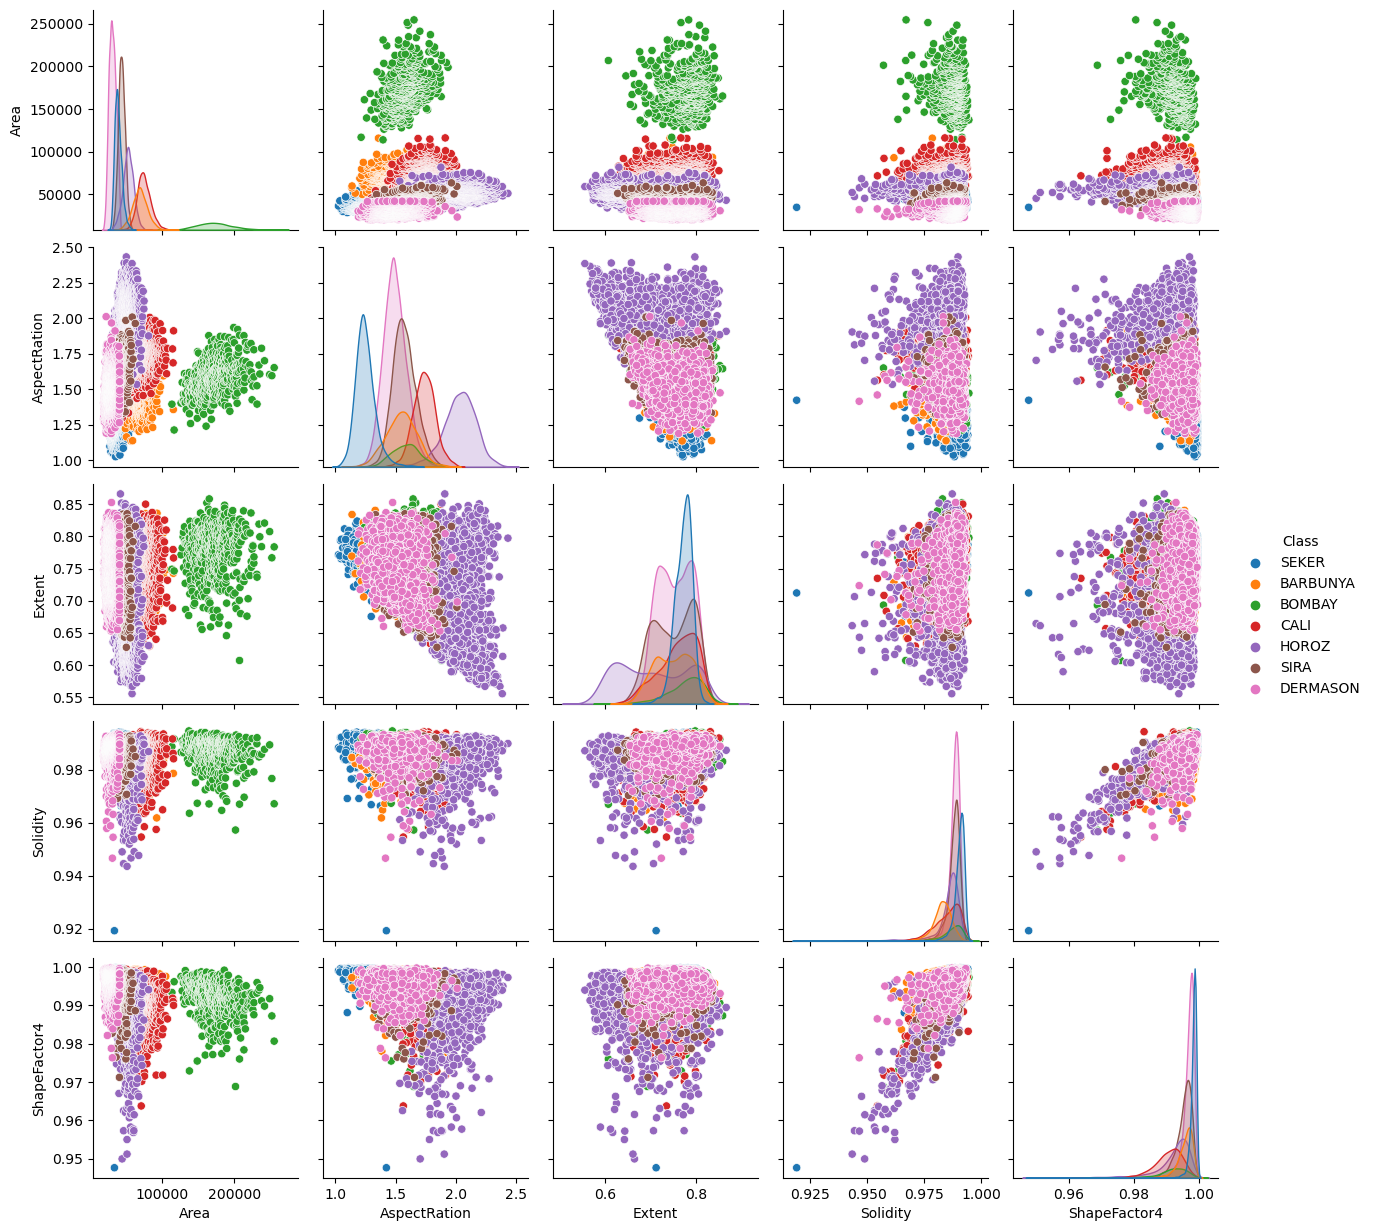

In [48]:
sns.pairplot(df_clean,hue='Class')

## División de Datos Para Entrenamiento y Prueba

In [85]:
X_clean=df_clean.drop('Class',axis=1)
y_clean=df_clean.Class
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=589,shuffle=True,test_size=.2)

st_x= StandardScaler()
X_train=st_x.fit_transform(X_train)
X_test=st_x.transform(X_test)

# Entrenamiento del Modelo 

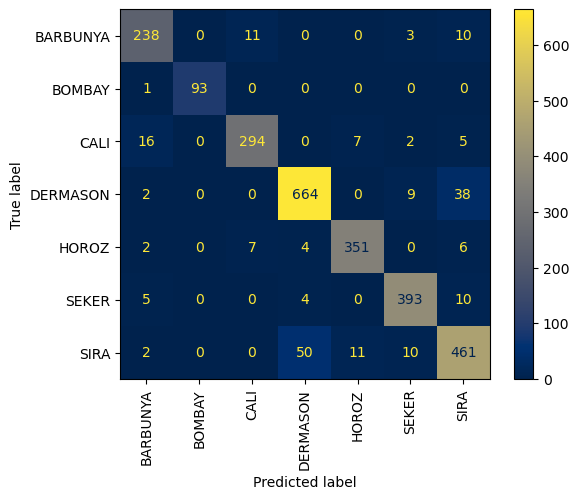

In [87]:
# Entrenamos el Modelo Sin Balanceo 
model= LogisticRegression(random_state=83)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
## Validando Nuestro Modelo 
cm= confusion_matrix(y_test,y_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap='cividis',xticks_rotation='vertical')
plt.show()


/home/andres/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


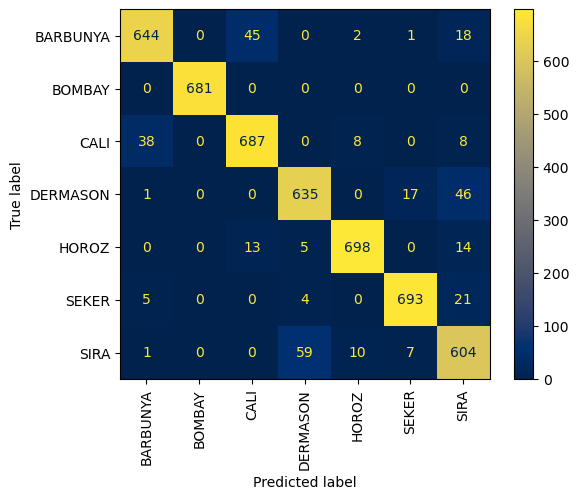

In [89]:

X=df_clean.drop('Class',axis=1)
y=df_clean.Class

X_over, y_over = oversampler.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=589,shuffle=True,test_size=.2)

st_x= StandardScaler()
X_train=st_x.fit_transform(X_train)
X_test=st_x.transform(X_test)
# Entrenamos el Modelo Sin Balanceo 
model= LogisticRegression(multi_class='multinomial',random_state=83)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
## Validando Nuestro Modelo 
cm= confusion_matrix(y_test,y_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap='cividis',xticks_rotation='vertical')
plt.show()